# ImageNode
The ImageNode class in Geomapi represents the data and metadata of image data. The data itself and methods build upon Open3D and OpenCV concepts while the metadata builds upon the RDFlib framework:

[https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html)

[https://rdflib.readthedocs.io/](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html)

The code below shows how to create a ImageNode from various inputs. 


First the geomapi and external packages are imported

In [1]:
#IMPORT PACKAGES
from rdflib import Graph
import os
import numpy as np

#IMPORT MODULES
from context import geomapi #context import for documentation only
from geomapi.nodes import ImageNode

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## ImageNode Creation

A ImageNode is constructed using the same parameters as the base Node. Please refer to [Node Tutorial](../tutorial/tutorial_nodes.ipynb) For more info about Node Creation

In [ ]:
ImageNode( subject = None,             # (URIRef, optional) : A subject to use as identifier for the Node.
           graph = None,               # (Graph, optional) : An RDF Graph to parse.
           graphPath = None,           # (Path, optional) : The path of an RDF Graph to parse.
           name = None,                # (str, optional) : A name of the Node.
           path = None,                # (Path, optional) : A filepath to a resource.
           timestamp = None,           # (str, optional) : Timestamp for the node.
           resource = None,            # (optional) : Resource associated with the node.
           cartesianTransform = None,  # (np.ndarray, optional) : The (4x4) transformation matrix.
           orientedBoundingBox = None, # (o3d.geometry.OrientedBoundingBox, optional) : The oriented bounding box of the node.
           convexHull = None,          # (o3d.geometry.TriangleImage, optional) : The convex hull of the node.
           loadResource = False,       # Load the resource at initialization?
           imageWidth = None,          # (int, optional) : width of the image in pixels (u). Defaults to 640p
           imageHeight = None,         # (int, optional) : height of the image in pixels (v). Defaults to 480p
           intrinsicMatrix = None,     # (np.array, optional) : intrinsic camera matrix (3x3) k=[[fx 0 cx] [0 fy cy][0 0  1]]
           focalLength35mm = None,     # (float, optional) : focal length with a standardised Field-of-View in pixels. Defaults to circa 2600pix for a 25.4mm lens
           keypoints = None,           # (np.array, optional) : a set of image keypoints, generated through sift or orb. 
           descriptors = None          # (np.array, optional) : a set of image descriptors, generated through sift or orb.
        )

### Ontology link

The ImageNode has 9 new standard properties that are serialized to the graph:

| python name | predicate |
|-----------  |-----------|
| `xmpPath` | `geomapi:xmpPath` |
| `xmlPath` | `geomapi:xmlPath` |
| `imageWidth` | `exif:imageWidth` |
| `imageHeight` | `exif:imageLength` |
| `principalPointU` | `geomapi:principalPointU` |
| `principalPointV` | `geomapi:principalPointV` |
| `focalLength35mm` | `geomapi:focalLength35mm` |
| `intrinsicMatrix` | `geomapi:intrinsicMatrix` |
| `depth` | `geomapi:depth` |


### Creation from Structure-from-Motion pipelines

As GEOMAPI is a geomatics API, the cartesianTransform of nodes is crucial to many of its functionality. For images, this is generally derived from Structure-from-Motion (SfM) pipelines. These pipelines allign the images in a common coordinate system of which the geospatial components are stored in software specific formats.

<br>

GEOMAPI currently supports two formats. [Agisoft Metashape](https://www.agisoft.com/) and [Capturing Reality](https://www.capturingreality.com/).

#### Capturing Reality
To import the pose of an image from the Capturing Reality pipeline, one should export the coordinate information of the image to an [XMP](https://support.capturingreality.com/hc/en-us/articles/360012410660-Coordinate-System-Preservation-with-XMPs-Full-body-Scans) file. These files are xml formatted and stored per image which yields cartesianTransform and some internal camera parameters such as the focalLength35mm, which is needed for digital renders. 

![rendering](../../pics/capturingreality1.PNG)

In [4]:
node=ImageNode(path = r"../../..\tests\testfiles\img\IMG_8834.jpg",  xmpPath=r"../../..\tests\testfiles\img\IMG_8834.xmp", depth=0.1, loadResource=True,focalLength35mm = 50)
print(node.cartesianTransform)
print(node.depth)

creating camera frustrum
0.1
[[ 4.12555151e-01  4.12058430e-02 -9.10000179e-01  6.68850552e+01]
 [ 9.10841440e-01 -4.52553581e-03  4.12731621e-01  4.52551195e+01]
 [ 1.28887160e-02 -9.99140430e-01 -3.93990225e-02  5.45377093e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
0.1


### Agisoft Metashape
Alternatively, Metashape exports its camera poses and properties in a common [XML file ](https://www.agisoft.com/forum/index.php?topic=6211.0). Therefore, the xml file is used to create a list of Imagenodes using the [`geomapi.tools.xml_to_image_nodes`](../geomapi/geomapi.tools.html#geomapi.tools.xml_to_image_nodes)

In [3]:
import geomapi.tools as tl

nodes = tl.xml_to_image_nodes(path=r"../../..\tests\testfiles\img\railway.xml")
print(len(nodes), "nodes parsed")
print("focallength35mm: \n",nodes[0].focalLength35mm)
print("intrinsic matrix \n", nodes[0].intrinsicMatrix)

191 nodes parsed
focallength35mm: 
 101.37203855665474
intrinsic matrix 
 [[2.19630446e+04 0.00000000e+00 5.82462523e+03]
 [0.00000000e+00 2.19630446e+04 4.31969922e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


## ImageNode Resource

When creating a ImageNode with a resource, it can be done either directly with an `np.ndarray`, `PIL.Image.Image` or `o3d.geometry.Image`, or with the path to an image file.

A resource can be a big piece of data, this is why it is not always wanted to load the whole resource at initialization. This is why the `loadResource` parameter is default to `False`


### Loading The Resource

In [10]:
node = ImageNode(path=r"../../..\tests\testfiles\img\IMG_8834.JPG", loadResource=False)
print("resource before loading:",node.resource)
node.load_resource() # Use specialized node fo each type of resource.
print("resource after loading:",node.resource)

Resource not loaded, but path is defined, call `load_resource()` to access it.
resource before loading: None
resource after loading: [[[ 58  63  40]
  [ 54  59  36]
  [ 51  52  34]
  ...
  [102 144 186]
  [102 144 186]
  [102 144 186]]

 [[ 58  63  40]
  [ 55  60  37]
  [ 51  52  34]
  ...
  [102 144 186]
  [102 144 186]
  [102 144 186]]

 [[ 59  64  41]
  [ 56  61  38]
  [ 52  53  35]
  ...
  [102 144 186]
  [102 144 186]
  [102 144 186]]

 ...

 [[160 159 138]
  [158 160 138]
  [158 160 138]
  ...
  [185 177 158]
  [183 175 156]
  [181 173 154]]

 [[158 160 139]
  [158 160 139]
  [158 160 139]
  ...
  [188 179 162]
  [186 177 160]
  [185 176 159]]

 [[159 161 140]
  [159 161 140]
  [158 161 140]
  ...
  [190 181 164]
  [189 180 163]
  [188 179 162]]]


### Saving The Resource

A Image resource can be saved to disk using the `save_resource()` function.
Currently supports: .ply, .obj

In [8]:
node = ImageNode(path=r"../../..\tests\testfiles\img\IMG_8834.JPG", loadResource=True)
node.save_resource(directory=r"../../../tests/testfiles/resources", extension=".jpg") # Save the resource to the resourcePath

True

## ImageNode Transformation

Since every nod has a cartesian transform, it can be transformed using the `node.transform()` function.

The transformation also updates the `convexHull` and `orientedBoundingBox`.


In [6]:
node = ImageNode()
print(node.cartesianTransform)
transformation = np.array([[0,0,1,0],[0,1,0,0],[1,0,0,0],[0,0,0,1]])
node.transform(transformation=transformation)
print("applying transformation: (-1)")
print(node.cartesianTransform,"\n")

node = ImageNode()
rotation = np.array([90,0,0]) #eulers in degrees
node.transform(rotation=rotation)
print("applying rotation: (90,0,0)")
print(node.cartesianTransform,"\n")

node = ImageNode()
translation = np.array([1,2,3])
node.transform(translation=translation)
print("applying translation: (1,2,3)")
print(node.cartesianTransform)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
applying transformation: (-1)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]] 

applying rotation: (90,0,0)
[[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]] 

applying translation: (1,2,3)
[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]


## World to Pixel and Pixel to World

You can use the functions [`geomapi.nodes.imagenode.ImageNode.world_to_pixel_coordinates`](../geomapi/geomapi.nodes.imagenode.html#geomapi.nodes.imagenode.ImageNode.world_to_pixel_coordinates) and [`geomapi.nodes.imagenode.ImageNode.pixel_to_world_coordinates`](../geomapi/geomapi.nodes.imagenode.html#geomapi.nodes.imagenode.ImageNode.pixel_to_world_coordinates) to convert between the coordinate systems.

In [25]:
imageNode = ImageNode(graphPath=r"../../../tests\testfiles\graphs\img_graph.ttl",  subject = "images#IMG_8834", loadResource=True)

# World to image
wp = np.array([-200,-10,-50])
uv, depths = imageNode.world_to_pixel_coordinates(wp)

print(uv, depths)

# Image to world
wp_back = imageNode.pixel_to_world_coordinates(uv, depths)

print(wp_back)


[[  50.65828383 2636.14019386]] [278.12925345]
[[-200.  -10.  -50.]]


## ImageNode Visualisation

When a ImageNode has a resource, the `show()` function displays the Image using matplotlib.

Use the `convertColorspace` parameter to switch the Blue and Red channels of the image


creating camera frustrum
1


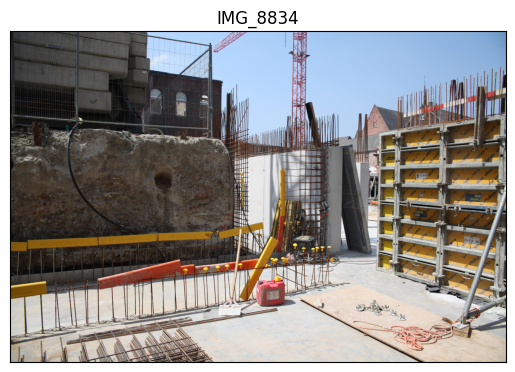

In [4]:
node = ImageNode(path=r"../../..\tests\testfiles\img\IMG_8834.JPG", loadResource=True, focalLength35mm=50)
node.show(convertColorspace=False)

ImageNodes can also be shown as 3D camera frustums

In [5]:
node.show(show3d=True)

## Feature Detection

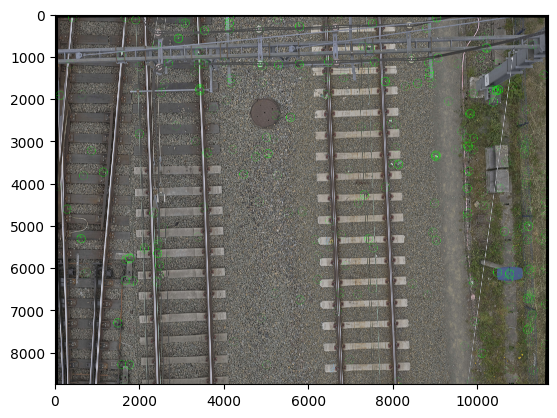

In [13]:
from matplotlib import pyplot as plt
node = ImageNode(path=r"../../..\tests\testfiles\img\IMG_8834.JPG", loadResource=True)

imageNode.get_image_features()
image = imageNode.draw_keypoints_on_image()
plt.imshow(image)


## Further reading

Please refer to the full [API documentation](../geomapi/geomapi.nodes.Imagenode.rst) of the ImageNode class for more details about the functionality